# DNA Sequencing of Chimpanzee ML classification
## DNA Classifier using NLP
### A classification model which can predict gene's function of a Chimpanzee based on DNA Sequence

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Data

In [4]:
chimp_data = pd.read_table("DNA Chimpanzee data.txt")

In [5]:
chimp_data.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


# Now, to work with this dna sequence,
#### we will be treating this DNA sequence as 'Language'  and for that, we will be using 'k-mer counting'

In [6]:
## Converting above sequence into k-mer words 
## here, 6 - hexa-mer words

def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [7]:
chimp_data['words'] = chimp_data.apply(lambda x: getKmers(x['sequence']), axis=1)

chimp_data = chimp_data.drop('sequence', axis=1)

In [8]:
chimp_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
3,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
4,6,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."


### Now, we will be converting k-mers for each gene into string
#### So that it countvectorizer can be applied.

In [10]:
chimp_texts = list(chimp_data['words'])

for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
    
y_chimp = chimp_data.iloc[:, 0].values 

In [24]:
print(chimp_texts[7])

atgccc tgcccc gcccca ccccag cccagc ccagct cagctc agctcg gctcgg ctcggc tcggcg cggcgg ggcggc gcggcg cggcgg ggcggg gcgggg cggggg gggggc ggggcg gggcgg ggcggc gcggcg cggcgg ggcggc gcggcg cggcgg ggcggc gcggcg cggcgg ggcggc gcggcg cggcgg ggcggc gcggca cggcag ggcagc gcagcg cagcgg agcggg gcgggg cggggg ggggga ggggag gggagg ggaggc gaggcg aggcgg ggcggc gcggcg cggcgg ggcggc gcggct cggctc ggctcc gctcca ctccag tccagc ccagcg cagcgc agcgcc gcgccg cgccgg gccggg ccgggg cggggc ggggcg gggcgg ggcggc gcggcc cggccg ggccgg gccggc ccggcg cggcgg ggcgga gcggag cggagg ggaggg gagggg agggga ggggac gggacg ggacga gacgac acgacc cgacct gacctc acctcg cctcgg ctcggg tcgggg cggggc ggggcg gggcga ggcgaa gcgaac cgaacg gaacga aacgac acgacg cgacga gacgag acgagc cgagct gagctg agctga gctgat ctgatc tgatcc gatccc atcccc tcccct cccctt cccttc ccttcc cttcca ttccag tccagg ccagga caggac aggacg ggacga gacgag acgagg cgaggg gagggg aggggg gggggg gggggc ggggcg gggcga ggcgag gcgagg cgagga gaggag aggagc ggagca gagcag agcagg gcagga caggag aggagc

In [26]:
y_chimp

array([4, 4, 4, ..., 6, 3, 3], dtype=int64)

### Now, Bag of Words 
#### Using Count vectorizer - NLP

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(4,4))

X_chimp = cv.fit_transform(chimp_texts)

In [29]:
print(X_chimp.shape)

(1682, 229684)


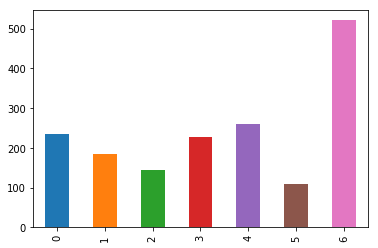

In [34]:
## Checking for Balanced dataset

chimp_data['class'].value_counts().sort_index().plot.bar()

### Train-Test split

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_chimp, y_chimp, test_size = 0.20, random_state=42)

In [38]:
print(X_train.shape)

(1345, 229684)


In [39]:
print(X_test.shape)

(337, 229684)


## Applying Multinomial Naive Bayes classifier now :

In [41]:
from sklearn.naive_bayes import MultinomialNB

#taking the valure of alpha as 0.1
classifier = MultinomialNB(alpha=0.1)

classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

### Prediction now

In [42]:
y_pred = classifier.predict(X_test)

## Checking Performance of trained model now

### Confusion MATRIX

In [43]:
print("Confusion matrix\n")

print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

Confusion matrix

Predicted   0   1   2   3   4   5    6
Actual                                
0          27   0   0   0   0   0    1
1           0  38   0   0   0   0    1
2           0   0  25   0   0   0    2
3           0   0   0  41   0   0    2
4           2   1   0   3  40   0    6
5           3   0   0   0   3  19    4
6           0   0   0   1   0   0  118


### Accuracy --- Precision --- Recall --- F-score

In [45]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.914 
precision = 0.920 
recall = 0.914 
f1 = 0.911
